### ***TASK - 1***

In [ ]:
# Data reading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/smartbridge/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.shape

(200, 6)

In [ ]:
# Checking for null values

df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

<Axes: >

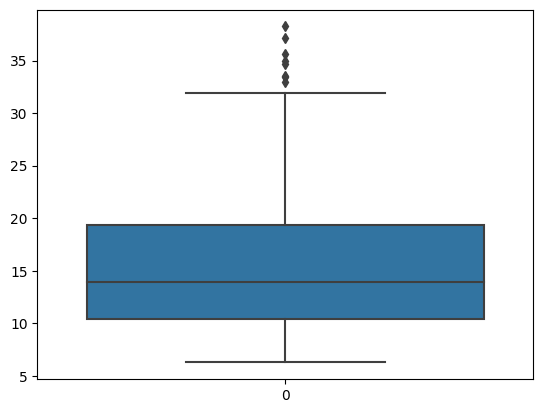

In [ ]:
# Outlier Detection

sns.boxplot(df.Na_to_K)

In [ ]:
p= df.Na_to_K.quantile(0.99)
p

35.65448999999999

In [ ]:
df = df[df.Na_to_K<=p]

<Axes: >

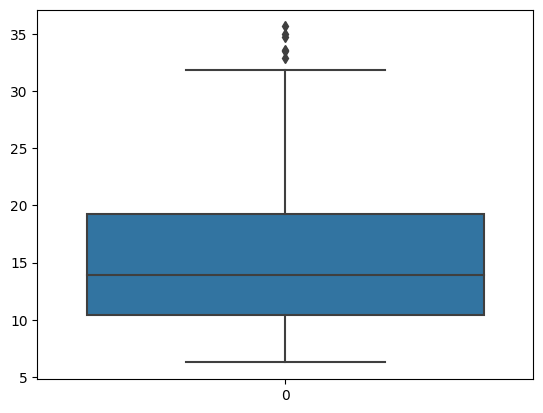

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
df.shape

(198, 6)

In [ ]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1
IQR

8.770999999999997

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df.median()

<ipython-input-10-e7658ec4f1f9>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9345
dtype: float64

<Axes: >

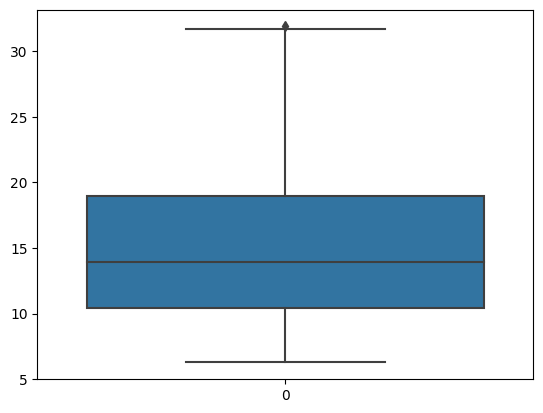

In [ ]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.93,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [ ]:
# Splitting data

x = df.iloc[:,0:5]
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
y= df['Drug']
y.head(5)

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [ ]:
y=pd.DataFrame(y)
y.head(5)

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [ ]:
# Splitting testing and training data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)


In [ ]:
x.shape

(198, 5)

In [ ]:
xtrain.shape, xtest.shape


((158, 5), (40, 5))

In [ ]:
y.shape

(198, 1)

In [ ]:
ytrain.shape, ytest.shape

((158, 1), (40, 1))

In [ ]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initialize the lib
#le.fit_transform(df['Drug'])

In [ ]:
xtrain['Na_to_K'] = le.fit_transform(xtrain['Na_to_K'])
xtrain['Na_to_K']

14      61
199     49
12      86
171     29
92     145
      ... 
3        7
131     75
135     54
156     46
75     121
Name: Na_to_K, Length: 158, dtype: int64

In [ ]:
xtest['Na_to_K'] = le.transform(xtest['Na_to_K'])
xtest['Na_to_K']

152     7
11     19
133    25
94     15
86     13
21     25
63      8
61      9
7      11
29     17
32     11
55     14
132    13
16     11
23     15
148     7
180    22
90     16
99     16
93     29
123    16
109    16
51     10
169    11
168    23
182    11
190    18
31      9
114     9
145     9
81      7
41     14
138    11
85     13
155    10
1      13
5       8
47     10
185    25
151    11
Name: Na_to_K, dtype: int64

In [ ]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['Sex']

14     0
199    0
12     1
171    1
92     0
      ..
3      0
131    1
135    1
156    1
75     1
Name: Sex, Length: 158, dtype: int64

In [ ]:
xtest['Sex'] = le.transform(xtest['Sex'])
xtest['Sex']

152    1
11     0
133    1
94     1
86     0
21     1
63     1
61     1
7      1
29     1
32     1
55     0
132    1
16     1
23     0
148    0
180    0
90     1
99     0
93     0
123    0
109    1
51     1
169    0
168    0
182    0
190    1
31     1
114    0
145    1
81     1
41     0
138    1
85     1
155    1
1      1
5      0
47     1
185    0
151    1
Name: Sex, dtype: int64

In [ ]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['BP']

14     2
199    1
12     1
171    1
92     0
      ..
3      2
131    1
135    1
156    0
75     1
Name: BP, Length: 158, dtype: int64

In [ ]:
xtest['BP'] = le.transform(xtest['BP'])
xtest['BP']

152    2
11     0
133    2
94     1
86     2
21     2
63     1
61     0
7      1
29     1
32     1
55     1
132    1
16     1
23     1
148    1
180    0
90     2
99     0
93     1
123    2
109    2
51     2
169    0
168    1
182    1
190    0
31     0
114    2
145    2
81     2
41     0
138    0
85     0
155    1
1      1
5      2
47     1
185    2
151    0
Name: BP, dtype: int64

In [ ]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

14     0
199    1
12     0
171    1
92     0
      ..
3      0
131    1
135    1
156    1
75     1
Name: Cholesterol, Length: 158, dtype: int64

In [ ]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

152    1
11     1
133    0
94     0
86     0
21     0
63     1
61     1
7      0
29     0
32     1
55     0
132    1
16     1
23     0
148    1
180    1
90     0
99     1
93     1
123    0
109    0
51     1
169    0
168    1
182    1
190    0
31     0
114    1
145    0
81     0
41     1
138    1
85     0
155    0
1      0
5      0
47     0
185    1
151    0
Name: Cholesterol, dtype: int64

In [ ]:
ytrain['Drug'] = le.fit_transform(ytrain['Drug'])
ytrain['Drug']

14     4
199    4
12     0
171    4
92     0
      ..
3      4
131    0
135    4
156    1
75     0
Name: Drug, Length: 158, dtype: int64

In [ ]:
ytest['Drug'] = le.transform(ytest['Drug'])
ytest['Drug']

152    4
11     0
133    0
94     0
86     4
21     0
63     4
61     1
7      3
29     0
32     4
55     3
132    4
16     4
23     0
148    4
180    0
90     0
99     0
93     0
123    0
109    0
51     4
169    1
168    0
182    4
190    0
31     2
114    4
145    4
81     4
41     2
138    2
85     2
155    3
1      3
5      4
47     3
185    0
151    2
Name: Drug, dtype: int64

In [ ]:
###


xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
14,50,0,2,0,61
199,40,0,1,1,49
12,43,1,1,0,86
171,45,1,1,1,29
92,29,0,0,0,145
...,...,...,...,...,...
3,28,0,2,0,7
131,52,1,1,1,75
135,74,1,1,1,54
156,31,1,0,1,46


In [ ]:
ytrain

,Drug
14,4
199,4
12,0
171,4
92,0
...,...
3,4
131,0
135,4
156,1


### ***Task - 2***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

reg_model = Sequential()
# Input layer
reg_model.add(Dense(4,activation='relu'))
# 1st hidden layer
reg_model.add(Dense(64,activation='relu'))
# 2nd hidden layer
reg_model.add(Dense(32,activation='relu'))
# 3nd hidden layer
reg_model.add(Dense(32,activation='relu'))
# Output layer
reg_model.add(Dense(1,activation='linear'))

In [ ]:
reg_model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
reg_model.fit(xtrain,ytrain,batch_size=5,epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 3ms/step - loss: 3.7046 - accuracy: 0.5127
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 2.9023 - accuracy: 0.5190
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 2.5860 - accuracy: 0.2025
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 2.4710 - accuracy: 0.1329
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3594 - accuracy: 0.1329
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3488 - accuracy: 0.1329
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3755 - accuracy: 0.1329
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 2.3617 - accuracy: 0.1329
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.2683 - accuracy: 0.1329
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 2.2072 - accuracy: 0.1329


### ***Task - 3***

In [ ]:
reg_model.predict([[60,0,12,1,70]])

1/1 [==============================] - 0s 120ms/step


array([[1.3006738]], dtype=float32)